在RNN中，过长距离的输入的依赖关系因为其计算结构的深度变得很难体现(可以用attention解决，直接查看记忆)；但是RNN无法并行化计算的问题仍然存在，后一状态的计算依赖于前一状态计算的完成。

Attention似乎是一个可行的解决：
- Maximum interation distance $O(1)$ 快速获取记忆信息
- Number of unparallelizable operations donot increase with sequence length.

模型表达能力和参数数量相关        
全连接网络可以利用更多的信息，跨越较长的距离，但是参数数量不固定，增长速度快
我们需要利用结构，找到利用信息量、表达能力和参数数量的平衡。


## Self-Attention
### Constructure
Consider in queries-keys-values perspective:    
$w_{1:n}$ be a sequence of words from $V$        
$w_i \in R^{|V|}$ (one-hot), $E \in R^{d\times|V|}$      
We get each word's embedding by $x_i = Ew_i$.    

- Transform each word embedding into (query, key, value) by mutiplicating $Q,K,V \in R^{d\times d}$
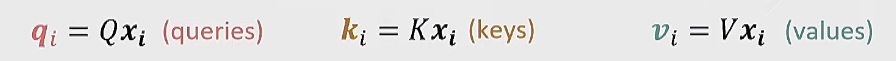
- Compute pairwise similarities between q and k; normalize with softmax; => attention scores
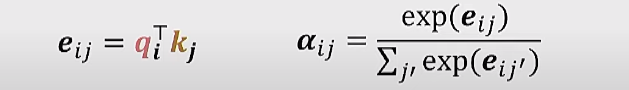
- Compute output for each word with weighted sum of values, using attention scores as weights
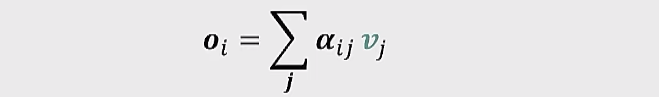


### Problems & fixes
Lack of information for sequence order.    
Fix:    
Consider representing each word's index as a vector
$$p_i \in R^d,\ i = 1,2,...,n$$
A normal to incorporate is to add it to the embedding
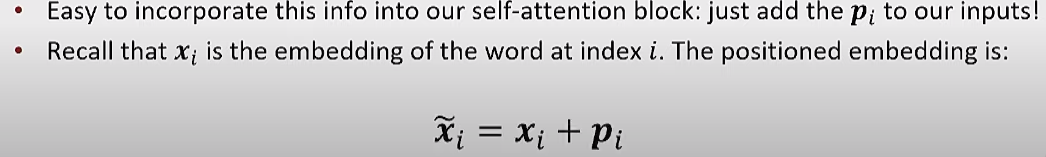
Learned absolute position representation:    
Learn a matrix $p \in R^{d\times n}$, $p_i$ is one column of $p$    
Cons: can not extrapolate to larger n

Lack of element-wise non-linearities.
Stacking self-attention layers is just re-averaging the values.
Fix:      
Add a feed-forward netword 
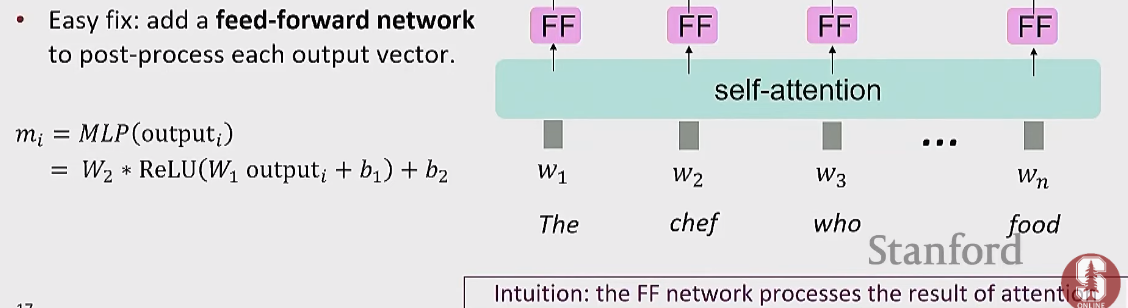

Lack of intuition of sequentially predicting(the structure of self-attention cannot guarantee the queries do not look at the "future")       
Fix:    
To enable parallelization, we can mask out attention to future words by setting attention scores to $-\infty$.
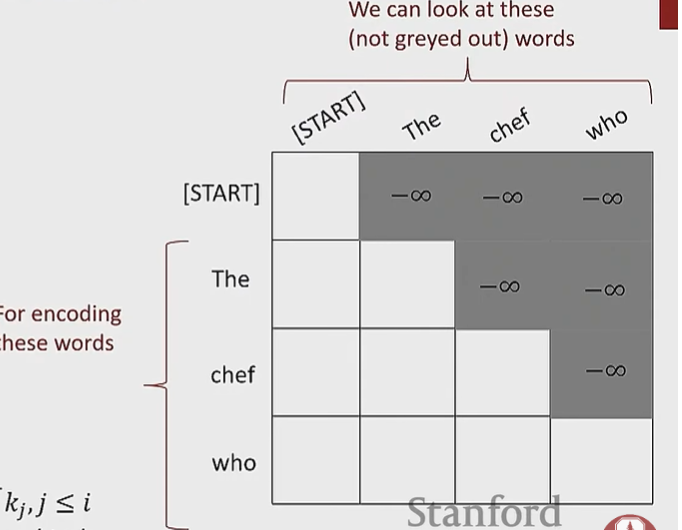
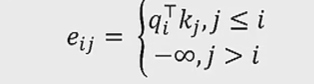

### A self-attention building block
- Position representations
- Self-attention
- Non-linearities
- Masking

## Transformer
### Decoder
A transformer decoder can be seen to construct 
$$P(x_t|x_{t-1},...,x_1)$$
e.g. language models
#### Multihead-attention
For word $i$, self-attention looks where $x_i^TQ^TKx_j$ is high, but maybe we want to focus on different $j$ for different reasons.     
We can define multiple attention "heads" through multiple $Q,K,V$.      
Let $Q_l, K_l, V_l \in R^{d\times\frac dh}$, h is the number of attention heads, $l \in {1,...,h}$    
Each attention head performs attention independently:          
$$output_l = softmax(XQ_lK_l^TX^T)*XV_l$$
Then the output is the heads' output combined
$$output = [output_1,...,output_h]Y, Y\in R^{d\times d}$$

When do multihead-attention, it can still be computational efficient by parallelization.     
- Instead of creating mutiple $Q,K,V$ directly, we still compute $XQ, XK, XV \in R^{n\times d}$ first, an then reshape them to $R^{n\times h \times d/h}$ => $R^{h\times n \times d/h}$
- Treat $h$ as batch axis

#### Scaled dot-product attention
When dimensionality $d$ becomes large, dot products between vectors tend to become large.   
If we do a softmax, the denominator would be huge.   
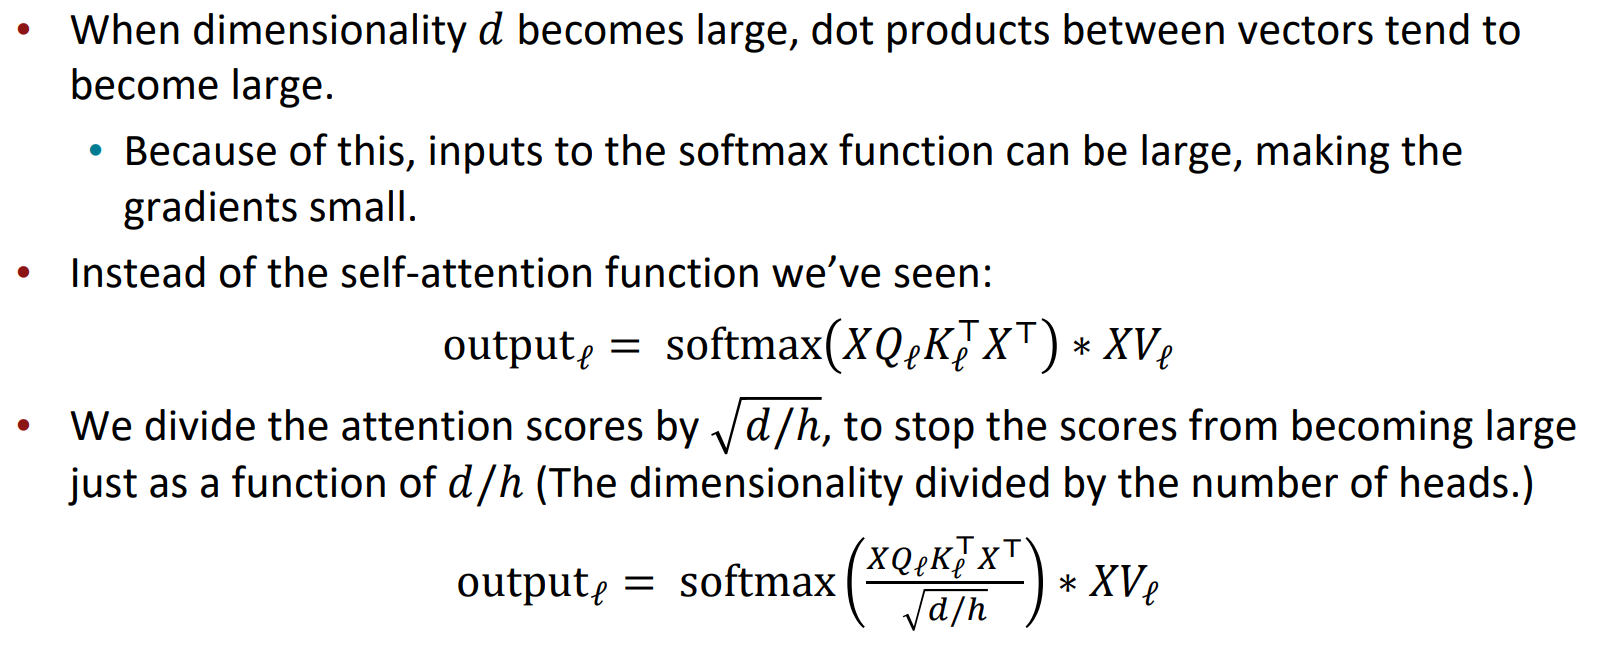
#### Residual Connections
- Optimization trick
Instead of $X^{(i)} = Layer(X^{(i-1)})$, we let $X^{(i)} = X^{(i-1)} + Layer(X^{(i-1)})$, so actually we only have to learn the residual(Layer part) 

#### Layer Normalization
- Optimization trick
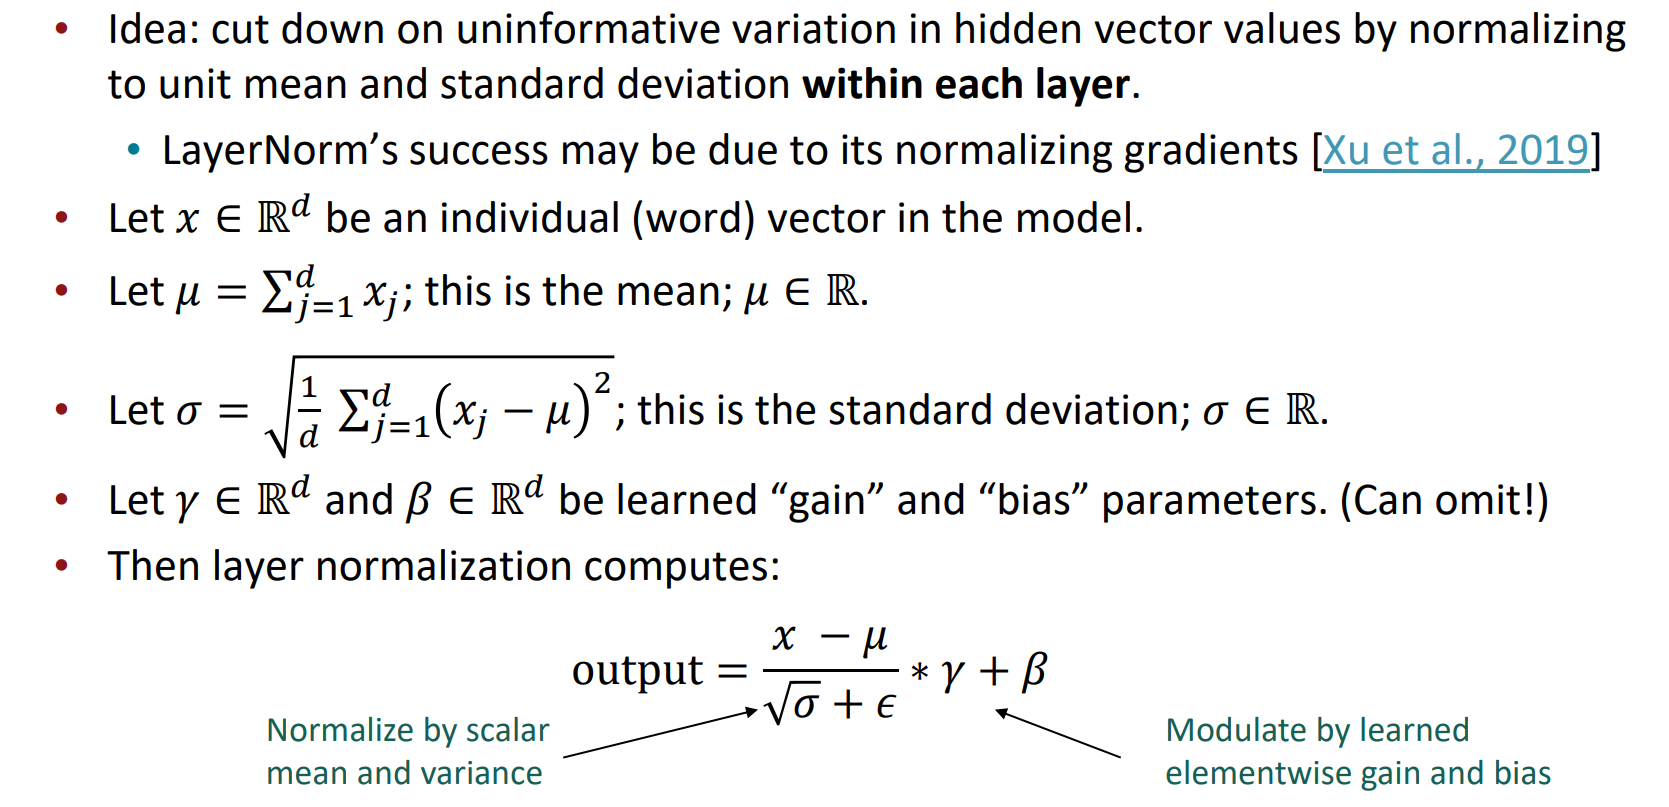

### Encoder
When encoding the embeddings, we may want bidirectional context. We can remove the masking in the self-attention.

### Transformer Encoder-Decoder
Using seq2seq format, the transformer is modified to perform cross-attention to the output of the encoder      
Broader     
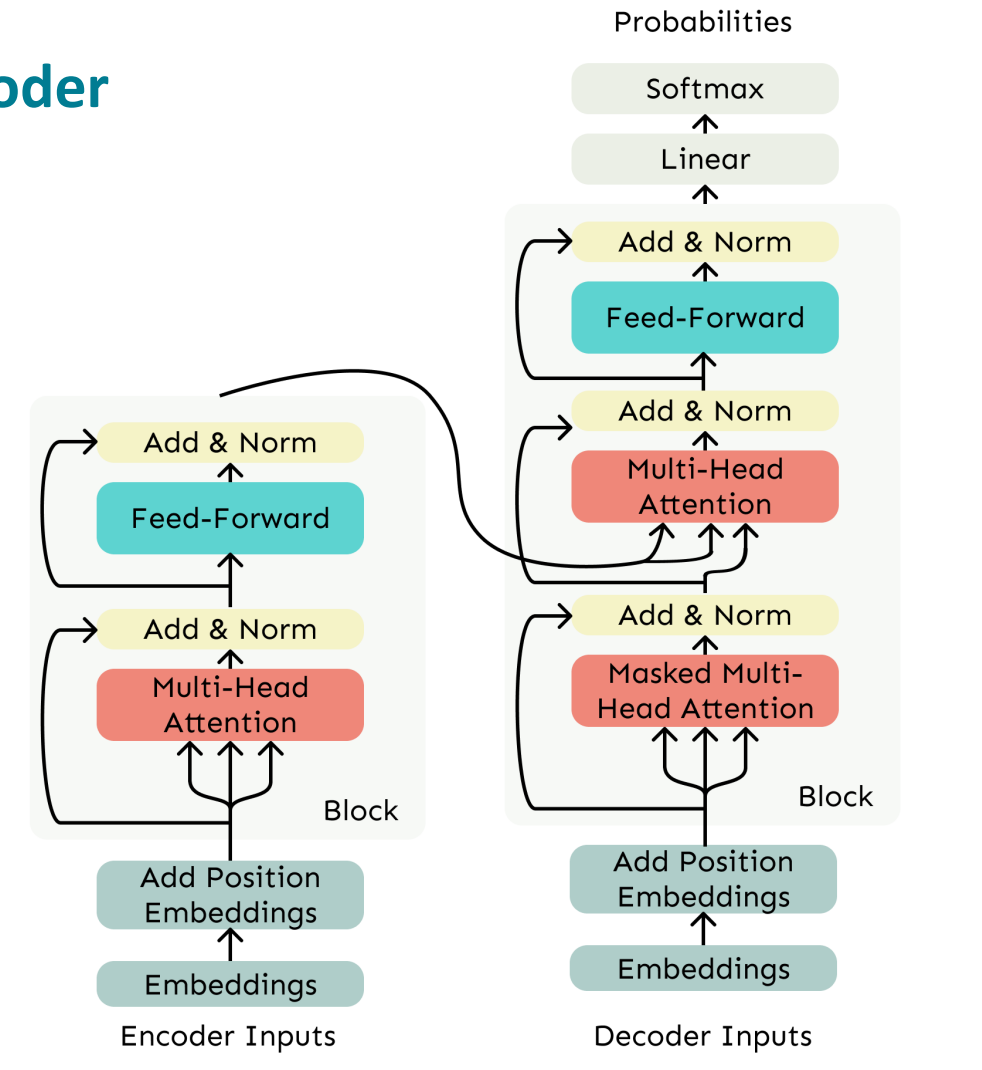
Closer
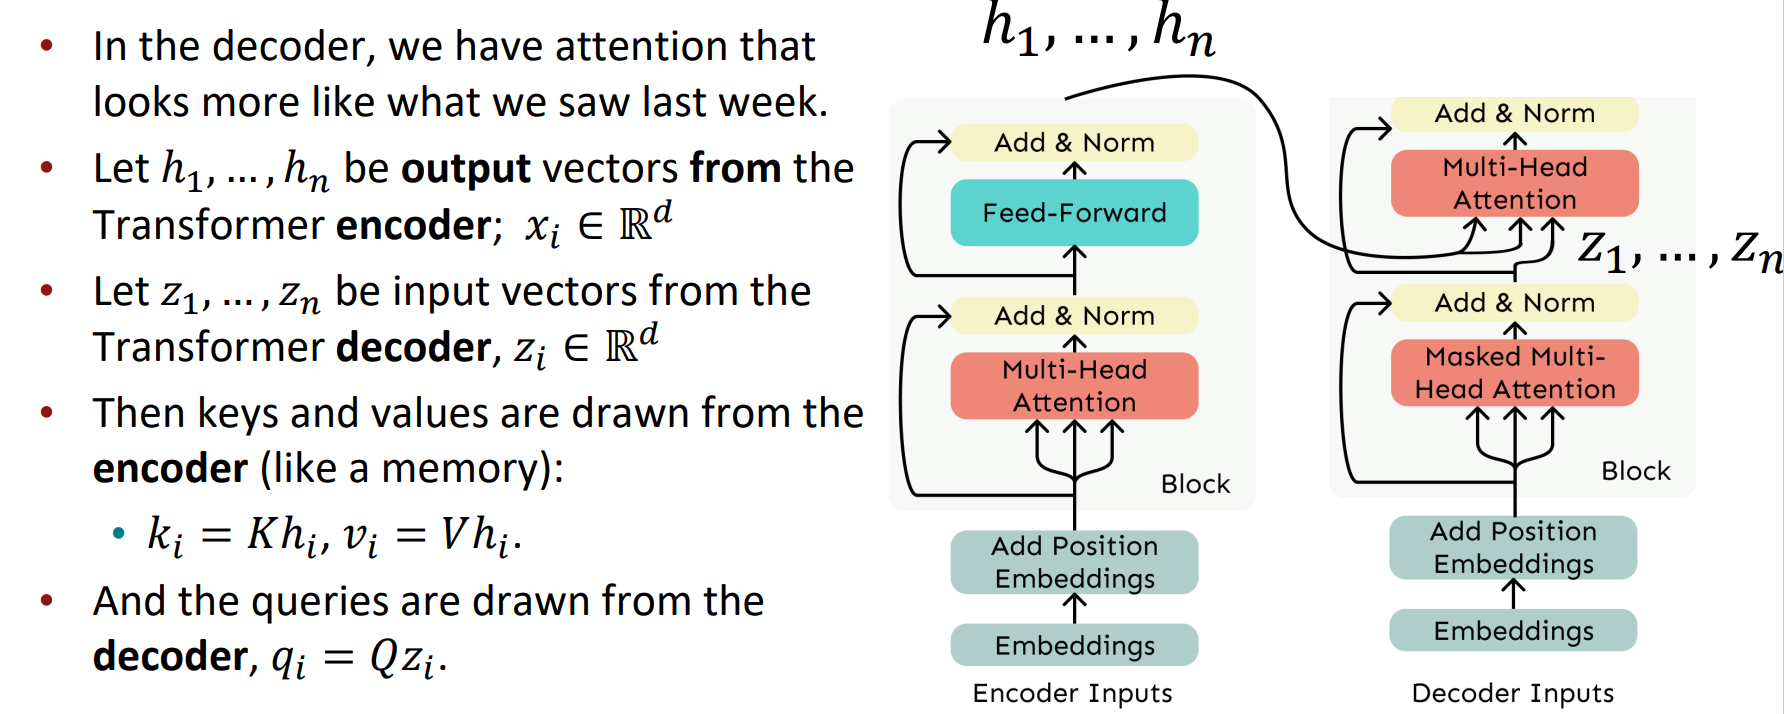